Имеются данные adult.csv (см. в материалах к занятию или на гитхабе).
Целевой переменной является уровень дохода income (крайний правый столбец).
Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Вам необходимо построить модель логистической регрессии, которая предсказывает уровень дохода человека. При возможности попробуйте улучшить точность предсказаний (метод score) с помощью перебора признаков.

Готовый ноутбук выложить на гитхаб и прислать ссылку.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data=pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#рассмотрим каждый категорильный признак по отдельности

In [6]:
data['workclass'].value_counts(normalize=True)

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

In [7]:
#есть значение ?, заменим его на private, потому что почти 70% данных имеют данное значение признака 'workclass'

In [8]:
data['workclass']=data['workclass'].apply(lambda x: 'Private' if x=='?' else x)

In [9]:
data['workclass'].value_counts(normalize=True)

Private             0.751505
Self-emp-not-inc    0.079071
Local-gov           0.064207
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

In [10]:
data['education'].value_counts(normalize=True)

HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64

In [11]:
data['educational-num'].value_counts(normalize=True)

9     0.323164
10    0.222718
13    0.164305
14    0.054400
11    0.042197
7     0.037099
12    0.032779
6     0.028439
4     0.019553
15    0.017075
5     0.015478
8     0.013452
16    0.012162
3     0.010421
2     0.005057
1     0.001699
Name: educational-num, dtype: float64

In [12]:
data['marital-status'].value_counts(normalize=True)

Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64

In [13]:
data['relationship'].value_counts(normalize=True)

Husband           0.403669
Not-in-family     0.257627
Own-child         0.155215
Unmarried         0.104930
Wife              0.047725
Other-relative    0.030834
Name: relationship, dtype: float64

In [14]:
data['race'].value_counts(normalize=True)

White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: race, dtype: float64

In [15]:
data['gender'].value_counts(normalize=True)

Male      0.668482
Female    0.331518
Name: gender, dtype: float64

In [16]:
# с этими признаком все в порядке

In [17]:
data['occupation'].value_counts(normalize=True)

Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
?                    0.057512
Transport-moving     0.048217
Handlers-cleaners    0.042423
Farming-fishing      0.030507
Tech-support         0.029606
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: occupation, dtype: float64

In [18]:
#здесь заполним на значение 'unknown'

In [19]:
data['occupation']=data['occupation'].apply(lambda x: 'Unknown' if x=='?' else x)

In [20]:
data['occupation'].value_counts(normalize=True)

Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
Unknown              0.057512
Transport-moving     0.048217
Handlers-cleaners    0.042423
Farming-fishing      0.030507
Tech-support         0.029606
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: occupation, dtype: float64

In [21]:
data['native-country'].value_counts(normalize=True)

United-States                 0.897424
Mexico                        0.019471
?                             0.017546
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Greece                   

In [22]:
#здесь заменю пропущенное значение на самое популярное значение

In [23]:
data['native-country']=data['native-country'].apply(lambda x: 'United-States' if x=='?' else x)

In [24]:
data['native-country'].value_counts(normalize=True)

United-States                 0.914971
Mexico                        0.019471
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Greece                        0.001003
Nicaragua                

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


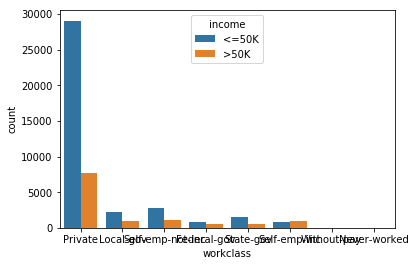

In [26]:
sns.countplot(x='workclass', hue='income', data=data)

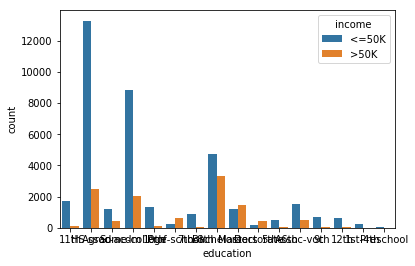

In [27]:
sns.countplot(x='education', hue='income', data=data)

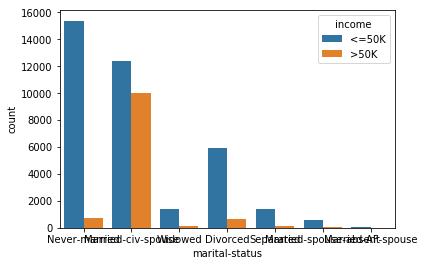

In [28]:
sns.countplot(x='marital-status', hue='income', data=data)

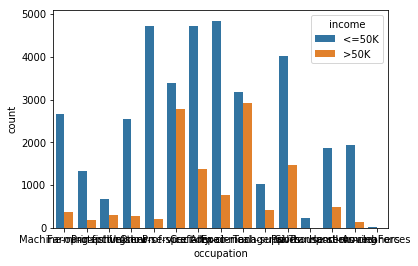

In [29]:
sns.countplot(x='occupation', hue='income', data=data)

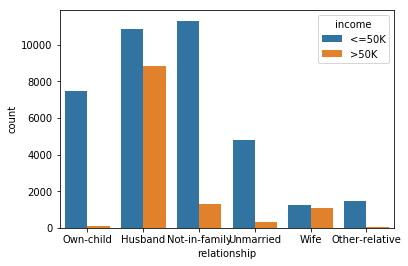

In [30]:
sns.countplot(x='relationship', hue='income', data=data)

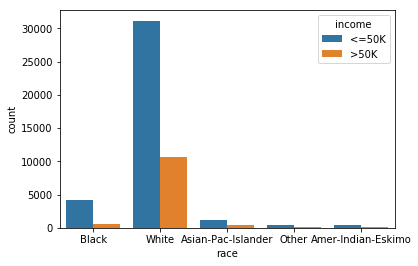

In [31]:
sns.countplot(x='race', hue='income', data=data)

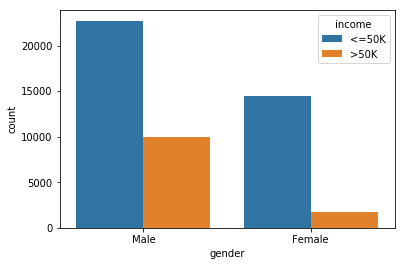

In [32]:
sns.countplot(x='gender', hue='income', data=data)

In [33]:
le = LabelEncoder()
le.fit( data['income'] )

LabelEncoder()

In [34]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [35]:
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [36]:
data.drop('income', axis=1, inplace=True)

In [37]:
#выберу 5 признаков, на которых буду учить модель
#age, hours-per-week, workclass, education,  marital-status

In [38]:
data_1=data[['age', 'hours-per-week', 'workclass', 'education',  'marital-status']]

In [39]:
data_1=pd.get_dummies(data_1, columns=['workclass', 'education',  'marital-status'])

In [40]:
data_1.head()

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,50,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,44,40,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,18,30,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [41]:
data_1_train, data_1_test, y_train, y_test=train_test_split(data_1, y, test_size=0.3, random_state=20)

In [42]:
lr=LogisticRegression()

In [43]:
lr.fit(data_1_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
lr.score(data_1_train, y_train)

0.8254116821199801

In [45]:
lr.score(data_1_test, y_test)

0.8270661298027707

In [46]:
predictions_1=lr.predict_proba(data_1_test)

In [47]:
predictions_1

array([[0.98125847, 0.01874153],
       [0.93725808, 0.06274192],
       [0.63484223, 0.36515777],
       ...,
       [0.7404134 , 0.2595866 ],
       [0.969379  , 0.030621  ],
       [0.97315376, 0.02684624]])

In [48]:
from sklearn.metrics import roc_curve

In [49]:
fpr_1,tpr_1,thres_1=roc_curve(y_test, predictions_1[:, 1])

Populating the interactive namespace from numpy and matplotlib


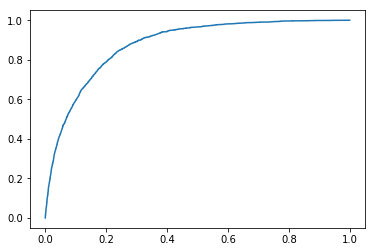

In [50]:
%pylab inline
plt.plot(fpr_1, tpr_1)

In [51]:
#теперь попробую выбрать 10 признаков, на которых буду обучать модель
#age, hours-per-week, workclass, education,  marital-status, occupation, relationship, gender, capital-gain, capital-loss

In [52]:
data_2=data[['age', 'hours-per-week', 'workclass', 'education',  'marital-status', 'occupation', 'relationship', 'gender', 'capital-gain', 'capital-loss']]

In [53]:
data_2=pd.get_dummies(data_2, columns=['workclass', 'education',  'marital-status', 'occupation', 'relationship', 'gender'])

In [54]:
data_2.head()

,age,hours-per-week,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,occupation_Unknown,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,25,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,38,50,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,28,40,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,44,40,7688,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,18,30,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [55]:
data_2_train, data_2_test, y_train, y_test=train_test_split(data_2, y, test_size=0.3, random_state=20)

In [56]:
lr.fit(data_2_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
lr.score(data_2_train, y_train)

0.8517944368071602

In [58]:
lr.score(data_2_test, y_test)

0.8501330785504675

In [59]:
predictions_2=lr.predict_proba(data_2_test)

In [60]:
predictions_2

array([[0.98673982, 0.01326018],
       [0.96648808, 0.03351192],
       [0.76913368, 0.23086632],
       ...,
       [0.6931631 , 0.3068369 ],
       [0.98876388, 0.01123612],
       [0.99567439, 0.00432561]])

In [61]:
fpr_2,tpr_2,thres_2=roc_curve(y_test, predictions_2[:, 1])

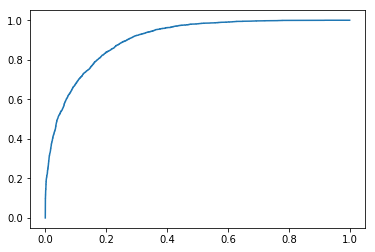

In [62]:
plt.plot(fpr_2, tpr_2)

In [63]:
#а теперь посмотрим, что получится, если построим модель на всех признаках

In [64]:
data_3=pd.get_dummies(data, columns=['workclass', 'education',  'marital-status', 'occupation', 'relationship', 'gender', 'race', 'native-country'])

In [65]:
data_3_train, data_3_test, y_train, y_test=train_test_split(data_3, y, test_size=0.3, random_state=20)

In [66]:
lr.fit(data_3_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
lr.score(data_3_train, y_train)

0.7996431600807277

In [68]:
lr.score(data_3_test, y_test)

0.7943083327646215

In [69]:
predictions_3=lr.predict_proba(data_3_test)

In [70]:
fpr_3,tpr_3,thres_3=roc_curve(y_test, predictions_3[:, 1])

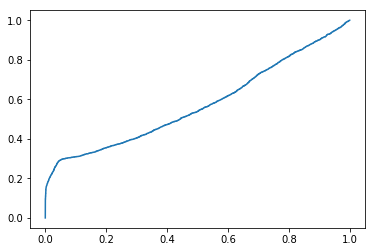

In [71]:
plt.plot(fpr_3, tpr_3)

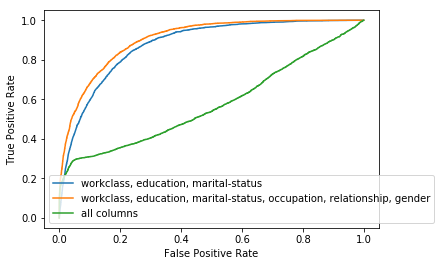

In [72]:
plt.plot(fpr_1, tpr_1, label='workclass, education, marital-status')
plt.plot(fpr_2, tpr_2, label='workclass, education, marital-status, occupation, relationship, gender')
plt.plot(fpr_3, tpr_3, label='all columns')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.show()

In [73]:
from sklearn.metrics import auc

In [74]:
auc(fpr_1, tpr_1)

0.8770798305816635

In [75]:
auc(fpr_2, tpr_2)

0.9042432249172693

In [76]:
auc(fpr_3, tpr_3)

0.574663029105437